# Cluster 2018

# clase_00: Importar data, describirla y visualizarla.

En esta primera clase aprenderemos a importar archivos .csv a python. Luego procederemos a realizar el adecuado pre-procesamiento y limpieza de datos con el fin de obtener un dataset acorde para ser analizado. Finalmente realizaremos un análisis exploratorio de los datos, con el fin de obtener estadísticas descriptivas y visualizaciones.

**Importamos las Librerías necesarias:** Utilizaremos Numpy para realizar calculos matriciales, pandas para manejar los datos y almacenarlos, y matplotlib junto con Seaborn para visualizar.

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read_CSV:** Descargamos de https://data.buenosaires.gob.ar/dataset/subte-viajes-molinetes el dataset de usuarios de subte por molinete del año 2017. Luego con el comando de Pandas "pd.read_csv" indicamos donde se ubica el dataset a ser leido. Una vez leido guardamos la tabla como un DataFrame de Pandas en el elemento "molinetes". Solicitaremos que el indice de nuestro dataframe importado sea la columna "PERIODO" del archvo .csv que manejamos.

In [4]:
# importante detallar que el delimiter indica como estan separadas las columnas en el dataframe.
#molinetes = pd.read_csv('/home/human/Dropbox/clusterai/molinetes_historico.csv', delimiter=';', index_col=['PERIODO'])
molinetes = pd.read_csv('/home/martin/Dropbox/clusterai/molinetes_historico.csv', delimiter=';', index_col=['PERIODO'])

In [5]:
# con el comando .head() podemos ver en pantalla las primeras filas y del dataframe
molinetes.head()

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
PERIODO,,,,,,,,,,,
201701,01/01/2017,08:00:00,08:15:00,LINEA_H,LINEA_H_CASEROS_SUR_TURN02,CASEROS,1,0,0,1,1
201701,01/01/2017,08:00:00,08:15:00,LINEA_H,LINEA_H_CASEROS_NORTE_TURN02,CASEROS,1,0,0,1,1
201701,01/01/2017,08:15:00,08:30:00,LINEA_H,LINEA_H_CASEROS_SUR_TURN02,CASEROS,2,0,0,2,1
201701,01/01/2017,08:15:00,08:30:00,LINEA_H,LINEA_H_CASEROS_SUR_TURN01,CASEROS,1,0,0,1,1
201701,01/01/2017,08:30:00,08:45:00,LINEA_H,LINEA_H_CASEROS_NORTE_TURN01,CASEROS,2,0,0,2,1


In [6]:
# si queremos saber cuantos renglones y columnas tiene el objeto en cuestion, utilizamos el comando de numpy "shape".
# asi podemos ver que nuestro dataset posee mas de 11 millones de renglones y 12 columnas
np.shape(molinetes)

(11938476, 11)

In [10]:
# Imprimimos en pantalla un reporte de un renglón sobre las dimensiones de nuestro dataframe.
# Ver que utilizamos la función de numpy "shape".
print("El dataset importado tiene "+ str(np.shape(molinetes)[0]) + " renglones y " + str(np.shape(molinetes)[1]) + " columnas")

El dataset importado tiene 11938476 renglones y 11 columnas


In [11]:
# revisamos si existen columnas que contengan valores faltantes (NaNs)
col_nulls = molinetes.isnull().any()
col_nulls

FECHA              False
DESDE              False
HASTA              False
LINEA              False
MOLINETE           False
ESTACION           False
PAX_PAGOS          False
PAX_PASES_PAGOS    False
PAX_FRANQ          False
TOTAL              False
ID                 False
dtype: bool

# Columnas e Indices en Pandas

**Columnas e Indices en Pandas: ** los dataframes de pandas se caracterizan por tener nombres explícitos por columna y por renglón (indice). Es decir que podemos llamar a un elemento (o varios) de un DataFrame por el nombre de su columna e índice.

In [12]:
# Obtenemos los nombres de las columnas del dataframe Molinetes
columnas_molinetes = molinetes.columns
columnas_molinetes

Index(['FECHA', 'DESDE', 'HASTA', 'LINEA', 'MOLINETE', 'ESTACION', 'PAX_PAGOS',
       'PAX_PASES_PAGOS', 'PAX_FRANQ', 'TOTAL', 'ID'],
      dtype='object')

In [13]:
# Obtenemos los nombres de los índices (renglones o instancias) del dataframe Molinetes.
# Observamos que cuando imprimimos en pantalla los índices, fueron definidos al importar el csv con el parametro 
# "index_col" seleccionando la columna "PERIODO".
instancias_molinetes = molinetes.index
instancias_molinetes

Int64Index([201701, 201701, 201701, 201701, 201701, 201701, 201701, 201701,
            201701, 201701,
            ...
            201712, 201712, 201712, 201712, 201712, 201712, 201712, 201712,
            201712, 201712],
           dtype='int64', name='PERIODO', length=11938476)

# Filtrar un dataframe por el valor de una columna

**Filtrar un dataframe por el valor de una columna:** Inicialmente filtraremos nuestro dataframe "molinetes_b" por el valor "LINEA_B" de la columna "LINEA".

In [14]:
# como inicialmente queremos trabajar con los datos de la Linea B, filtramos por el valor "LINEA_B" de la columna
# "LINEA" nuestro dataframe original llamado molinetes.
molinetes_b = molinetes.loc[molinetes['LINEA'] == 'LINEA_B']

In [15]:
molinetes_b.index

Int64Index([201701, 201701, 201701, 201701, 201701, 201701, 201701, 201701,
            201701, 201701,
            ...
            201712, 201712, 201712, 201712, 201712, 201712, 201712, 201712,
            201712, 201712],
           dtype='int64', name='PERIODO', length=2855204)

In [16]:
# observamos que la cantidad de renglones del nuevo dataframe es menor al del original, puesto que solo 
# estamos considerando a los molinetes de la linea B
np.shape(molinetes_b)

(2855204, 11)

# Primeras visualizaciones

Visualización Countplot de Seaborn para las distintas lineas de subte.

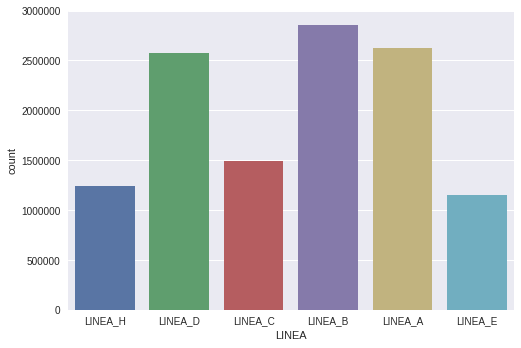

In [19]:
# con el comando "countplot" de Seaborn (importado como sns) generamos un gráfico de barras por la columna "LINEA"
sns.countplot(x="LINEA", data=molinetes)
plt.show()

Visualización de Countplot de Seaborn para las distintas estaciones de la linea B.

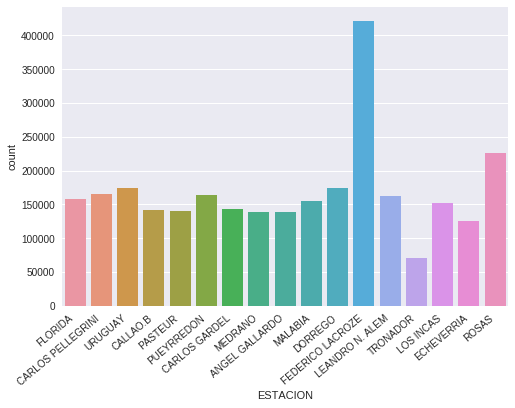

In [51]:
# luego generamos un countplot de seaborn por la columna estación, esta vez utilizando el nuevo dataframe filtrado
# molinetes_b, que solo contiene los datos de la linea B.
ax = sns.countplot(x="ESTACION", data=molinetes_b)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

# Estadisticas Descriptivas

In [20]:
# con el comando de numpy .mean() puedo obtener la media del elemento seleccionado, en este caso la columna 
# "TOTAL" del dataframe "molinetes_b".
media_tot_b = np.mean(molinetes_b['TOTAL'])

# Luego procedemos a imprimir por pantalla la media calculada mas un texto 
print("La media total de todo el año 2017 para la linea B es " + str(media_tot_b))

La media total de todo el año 2017 para la linea B es 31.07430502338887


In [21]:
# por medio del comando .std() de numpy podemos calcular el desvío estandard de la variable en cuestion, en este caso
# la columna "TOTAL" del dataframe molinetes_b
desvio_std_tot_b = np.std(molinetes_b['TOTAL'])
print("El desvio estándard de la variable total para todo el año 2017 es " + str(desvio_std_tot_b))

El desvio estándard de la variable total para todo el año 2017 es 33.073673874646964


In [23]:
# por medio del comando .describe() de pandas podemos obtener estadísticas descriptivas del elemento en cuestion,
# La cantidad de instancias, la media, el desvio estandard, el valor minimo, el 1er cuartil, el 2do cuartil, 
# el 3er cuartil y el valor máximo.
molinetes_b['TOTAL'].describe()

count    2.855204e+06
mean     3.107431e+01
std      3.307368e+01
min      0.000000e+00
25%      6.000000e+00
50%      2.000000e+01
75%      4.400000e+01
max      3.690000e+02
Name: TOTAL, dtype: float64

In [24]:
molinetes_b.index

Int64Index([201701, 201701, 201701, 201701, 201701, 201701, 201701, 201701,
            201701, 201701,
            ...
            201712, 201712, 201712, 201712, 201712, 201712, 201712, 201712,
            201712, 201712],
           dtype='int64', name='PERIODO', length=2855204)

# Análisis del mes de Abril

In [33]:
# generamos un nuevo dataframe filtrando y reteniendo las instancias/renglones con indice referido al mes de Abril
# el filtrado se realiza mediante la accion de pandas ".loc".
molinetes_b_abril = molinetes_b.loc[molinetes_b.index == 201704]

In [37]:
# imprimimos por pantalla los primeros 5 renglones del mes de abril
molinetes_b_abril.head()

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
PERIODO,,,,,,,,,,,
201704,01/04/2017,05:00:00,05:15:00,LINEA_B,LINEA_B_FLORIDA_E_TURN02,FLORIDA,0,0,0,0,20
201704,01/04/2017,05:00:00,05:15:00,LINEA_B,LINEA_B_FLORIDA_O_TURN04,FLORIDA,1,0,0,1,20
201704,01/04/2017,05:15:00,05:30:00,LINEA_B,LINEA_B_FLORIDA_O_TURN04,FLORIDA,1,0,0,1,20
201704,01/04/2017,05:30:00,05:45:00,LINEA_B,LINEA_B_FLORIDA_O_TURN01,FLORIDA,2,0,0,2,20
201704,01/04/2017,05:30:00,05:45:00,LINEA_B,LINEA_B_FLORIDA_O_TURN03,FLORIDA,1,0,0,1,20


In [38]:
# Obtenemos estadísticas descriptivas de la columna "TOTAL" del mes de abril.
molinetes_b_abril['TOTAL'].describe()

count    225725.000000
mean         30.301743
std          33.434120
min           0.000000
25%           6.000000
50%          19.000000
75%          43.000000
max         266.000000
Name: TOTAL, dtype: float64

# Visualización Distplot
Utilizaremos esta visualización para generar un histograma + una curva de distribución de los datos a partir de sus frecuencias poblacionales

/home/martin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


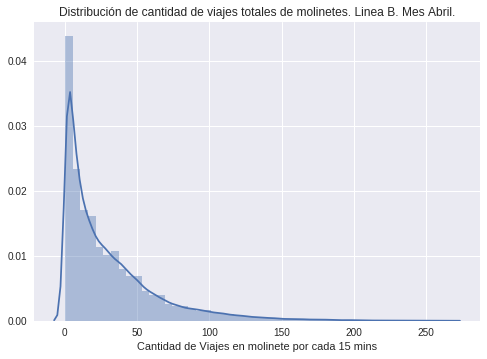

In [39]:
# displot para la columna "TOTAL" nos generará un histograma + la distribución generada de los datos a partir de 
# sus frecuencias poblacionales.
sns.distplot(molinetes_b_abril['TOTAL'])
plt.title('Distribución de cantidad de viajes totales de molinetes. Linea B. Mes Abril.')
plt.xlabel('Cantidad de Viajes en molinete por cada 15 mins')
plt.show()

In [40]:
# visualizamos en pantalla las columnas del dataframe de la linea B
molinetes_b.columns

Index(['FECHA', 'DESDE', 'HASTA', 'LINEA', 'MOLINETE', 'ESTACION', 'PAX_PAGOS',
       'PAX_PASES_PAGOS', 'PAX_FRANQ', 'TOTAL', 'ID'],
      dtype='object')

In [52]:
molinetes_b_abril.head()

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
PERIODO,,,,,,,,,,,
201704,01/04/2017,05:00:00,05:15:00,LINEA_B,LINEA_B_FLORIDA_E_TURN02,FLORIDA,0,0,0,0,20
201704,01/04/2017,05:00:00,05:15:00,LINEA_B,LINEA_B_FLORIDA_O_TURN04,FLORIDA,1,0,0,1,20
201704,01/04/2017,05:15:00,05:30:00,LINEA_B,LINEA_B_FLORIDA_O_TURN04,FLORIDA,1,0,0,1,20
201704,01/04/2017,05:30:00,05:45:00,LINEA_B,LINEA_B_FLORIDA_O_TURN01,FLORIDA,2,0,0,2,20
201704,01/04/2017,05:30:00,05:45:00,LINEA_B,LINEA_B_FLORIDA_O_TURN03,FLORIDA,1,0,0,1,20


# Tabla Pivote
Las tablas pivote son elementos poderosos para resumir la información de nuestro dataframe, seleccionando que datos queremos que marquen nuestros renglones, otros para las columnas y otros para los valores.

In [56]:
linea_b_2017 = pd.pivot_table(molinetes_b,values = 'TOTAL',columns = 'ESTACION', index = molinetes_b.index, aggfunc = np.sum)

In [59]:
linea_b_2017

ESTACION,ANGEL GALLARDO,CALLAO.B,CARLOS GARDEL,CARLOS PELLEGRINI,DORREGO,ECHEVERRIA,FEDERICO LACROZE,FLORIDA,LEANDRO N. ALEM,LOS INCAS,MALABIA,MEDRANO,PASTEUR,PUEYRREDON,ROSAS,TRONADOR,URUGUAY
PERIODO,,,,,,,,,,,,,,,,,
201701,302879,338280,353255,502598,292664,141750,511695,441188,553090,195713,377889,341292,248076,268862,541408,106590,309308
201702,284650,346552,325949,470302,271066,132879,474681,366084,495892,180915,349323,321815,238332,236438,508530,107466,342773
201703,406406,511642,415533,609721,377516,185013,686928,520120,712461,256731,503086,471902,362952,329502,708116,156945,486818
201704,370819,450017,393965,536940,337850,164278,619636,461547,621655,229347,449623,427819,315425,291638,625971,137022,406309
201705,413918,508358,421990,599664,387773,189237,706959,540982,711248,263497,516187,480948,351821,334416,729766,151766,473547
201706,419833,501238,436199,606456,393405,191515,716476,528098,655065,265865,528017,479090,350354,337907,716083,151239,474200
201707,415642,478820,529589,636781,395550,185792,709808,561457,683525,257155,520385,477493,348870,351933,697111,152511,462498
201708,447024,526154,462377,647641,412804,200447,757858,574394,687968,296256,543668,527635,376613,340882,763960,157194,490577
201709,444356,521767,453360,603784,388220,195315,754344,558004,704794,291394,535788,505395,373030,351097,757761,157413,473385


# Visualizando series de tiempo 
Utilizando el dataframe obtenido de la tabla pivote en el paso anterior, procedemos a visualizar la cantidad de pasajeros que pasaron por cada estación a lo largo de todo el año 2017.

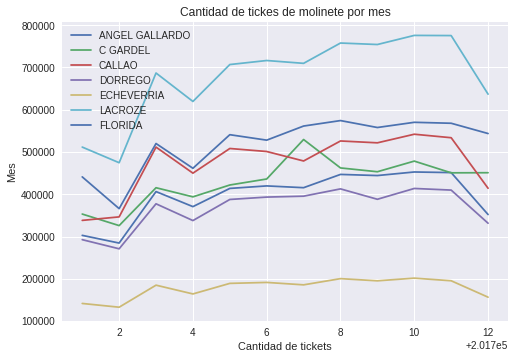

In [69]:
plt.plot(linea_b_2017.index, linea_b_2017['ANGEL GALLARDO'], label='ANGEL GALLARDO');
plt.plot(linea_b_2017.index, linea_b_2017['CARLOS GARDEL'], label='C GARDEL');
plt.plot(linea_b_2017.index, linea_b_2017['CALLAO.B'], label='CALLAO');
plt.plot(linea_b_2017.index, linea_b_2017['DORREGO'], label='DORREGO');
plt.plot(linea_b_2017.index, linea_b_2017['ECHEVERRIA'], label='ECHEVERRIA');
plt.plot(linea_b_2017.index, linea_b_2017['FEDERICO LACROZE'], label='LACROZE');
plt.plot(linea_b_2017.index, linea_b_2017['FLORIDA'], label='FLORIDA');
plt.legend()
plt.title('Cantidad de tickes de molinete por mes')
plt.xlabel('Cantidad de tickets')
plt.ylabel('Mes')
plt.show()

In [71]:
lineab_lacroze = molinetes_b.loc[molinetes_b['ESTACION']== 'FEDERICO LACROZE']

In [72]:
lineab_lacroze

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
PERIODO,,,,,,,,,,,
201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_LACROZE_O_TURN09,FEDERICO LACROZE,2,0,0,2,66
201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_LACROZE_E_TURN05,FEDERICO LACROZE,4,0,0,4,66
201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_LACROZE_E_TURN06,FEDERICO LACROZE,0,0,1,1,66
201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_LACROZE_O_TURN03,FEDERICO LACROZE,1,0,0,1,66
201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_LACROZE_O_TURN07,FEDERICO LACROZE,2,0,0,2,66
201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_LACROZE_E_TURN04,FEDERICO LACROZE,4,0,0,4,66
201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_LACROZE_O_TURN08,FEDERICO LACROZE,4,0,0,4,66
201701,01/01/2017,08:15:00,08:30:00,LINEA_B,LINEA_B_LACROZE_O_TURN07,FEDERICO LACROZE,1,0,1,2,66
201701,01/01/2017,08:15:00,08:30:00,LINEA_B,LINEA_B_LACROZE_O_TURN03,FEDERICO LACROZE,0,0,0,0,66


/home/martin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


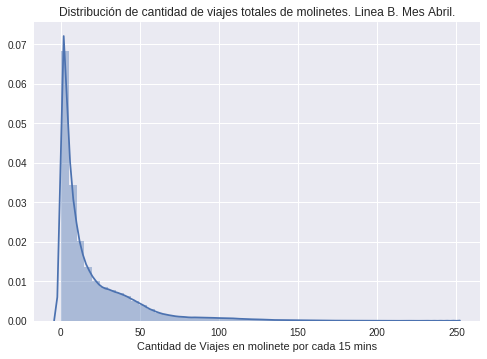

In [73]:
# displot para la columna "TOTAL" nos generará un histograma + la distribución generada de los datos a partir de 
# sus frecuencias poblacionales.
sns.distplot(lineab_lacroze['TOTAL'])
plt.title('Distribución de cantidad de viajes totales de molinetes. Linea B. Mes Abril.')
plt.xlabel('Cantidad de Viajes en molinete por cada 15 mins')
plt.show()